## Parameters of a Worm-Like Chain Molecule from Force-Extension Measurements

Francisco J. Palmero Moya @ Nynke Dekker Lab\
28/11/2023

In [1]:
# Import libraries
import yaml
import numpy as np
import matplotlib.pyplot as plt

# Import wlc modules
import sys
sys.path.append('../')
import wlc.models as models
import wlc.fitting as fitting

### Generate synthetic dataset

Text(0, 0.5, 'force [pN]')

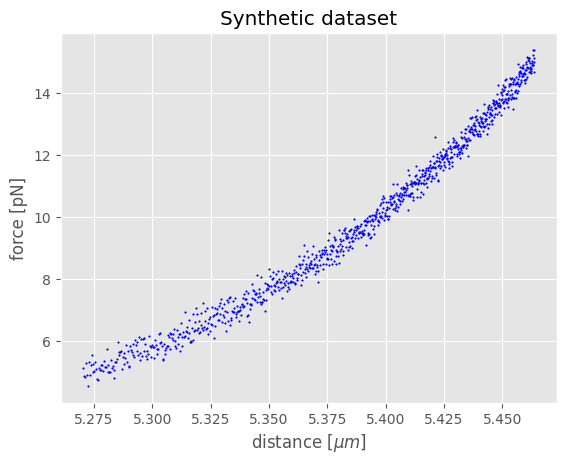

In [2]:
# Synthetic dataset parameters
KB = 0.013806 # Boltzmann constant in pN*nm*K-1
T = 30  # in degrees Celsius
Lc = 5600  # contour length in nm
Lp = 53  # persistence length in nm
S = 1255  # stretch modulus in pN

# Generate data with noise
F = np.linspace(5, 15, 1000)
d = models.odijk(F, KB*(273.15 + T), Lc, Lp, S)
data = d, F + np.random.normal(scale = 0.25, size=len(F))

# Plot the data
fig, ax = plt.subplots()
ax.set_title("Synthetic dataset")
ax.scatter(data[0], data[1], s = 1, c = "blue")
ax.set_xlabel(r"distance [$\mu m$]")
ax.set_ylabel(r"force [pN]")

### Fitting to obtain optimal parameters

In [3]:
# Load the YAML file
with open("../ymls/params.yml", 'r') as file:
    params = yaml.safe_load(file)

In [4]:
# Odijk
model = fitting.WormLikeChain(model="odijk")
print(model)

Odidjk worm-like chain model.

    .. math::
        d = L_c \left( 1 - \frac{1}{2}\sqrt{\frac{k_BT}{FL_p}} + \frac{F}{S}

    Parameters
    ----------
    F : array-like
        Required force to extend a worm-like chain. Units: [pN]
    kBT : float
        Boltzman contant times Temperature. Units: [pN*nm]
    Lc : float 
        Contour length. Units: [nm]
    Lp : float
        Persistance length. Units: [nm]
    S : float
        Stretch modulus. Units: [pN]

    Outputs
    -------
    d : array-like
        Distance between end-points. Units: [um]

    Odijk, T. 
    Stiff Chains and Filaments under Tension 
    Macromolecules 1995 28 (20) 
    7016-7018 doi: 10.1021/ma00124a044
    


In [5]:
# Compile model
model.compile(params)

# Fitting to the data
df = model.fit(data, min_delta=params["min_delta"], max_iters=params["max_iters"], verbose=True)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 2450.66it/s]


In [6]:
# Results are stored in a dataframe
df.head()

,opt_Lc[nm],opt_Lp[nm],opt_S[pN],nFittings,filename
0,5576.191716,60.041976,1073.450933,2,None


In [7]:
# The progress along iterations
model.df_full

,Lc[nm],Lp[nm],S[pN],Chisqr,filename,iter,dLp[nm]
0,5576.191715,60.041976,1073.450927,0.027588,None,1,inf
1,5576.191716,60.041976,1073.450933,0.027588,None,2,2.420359e-07


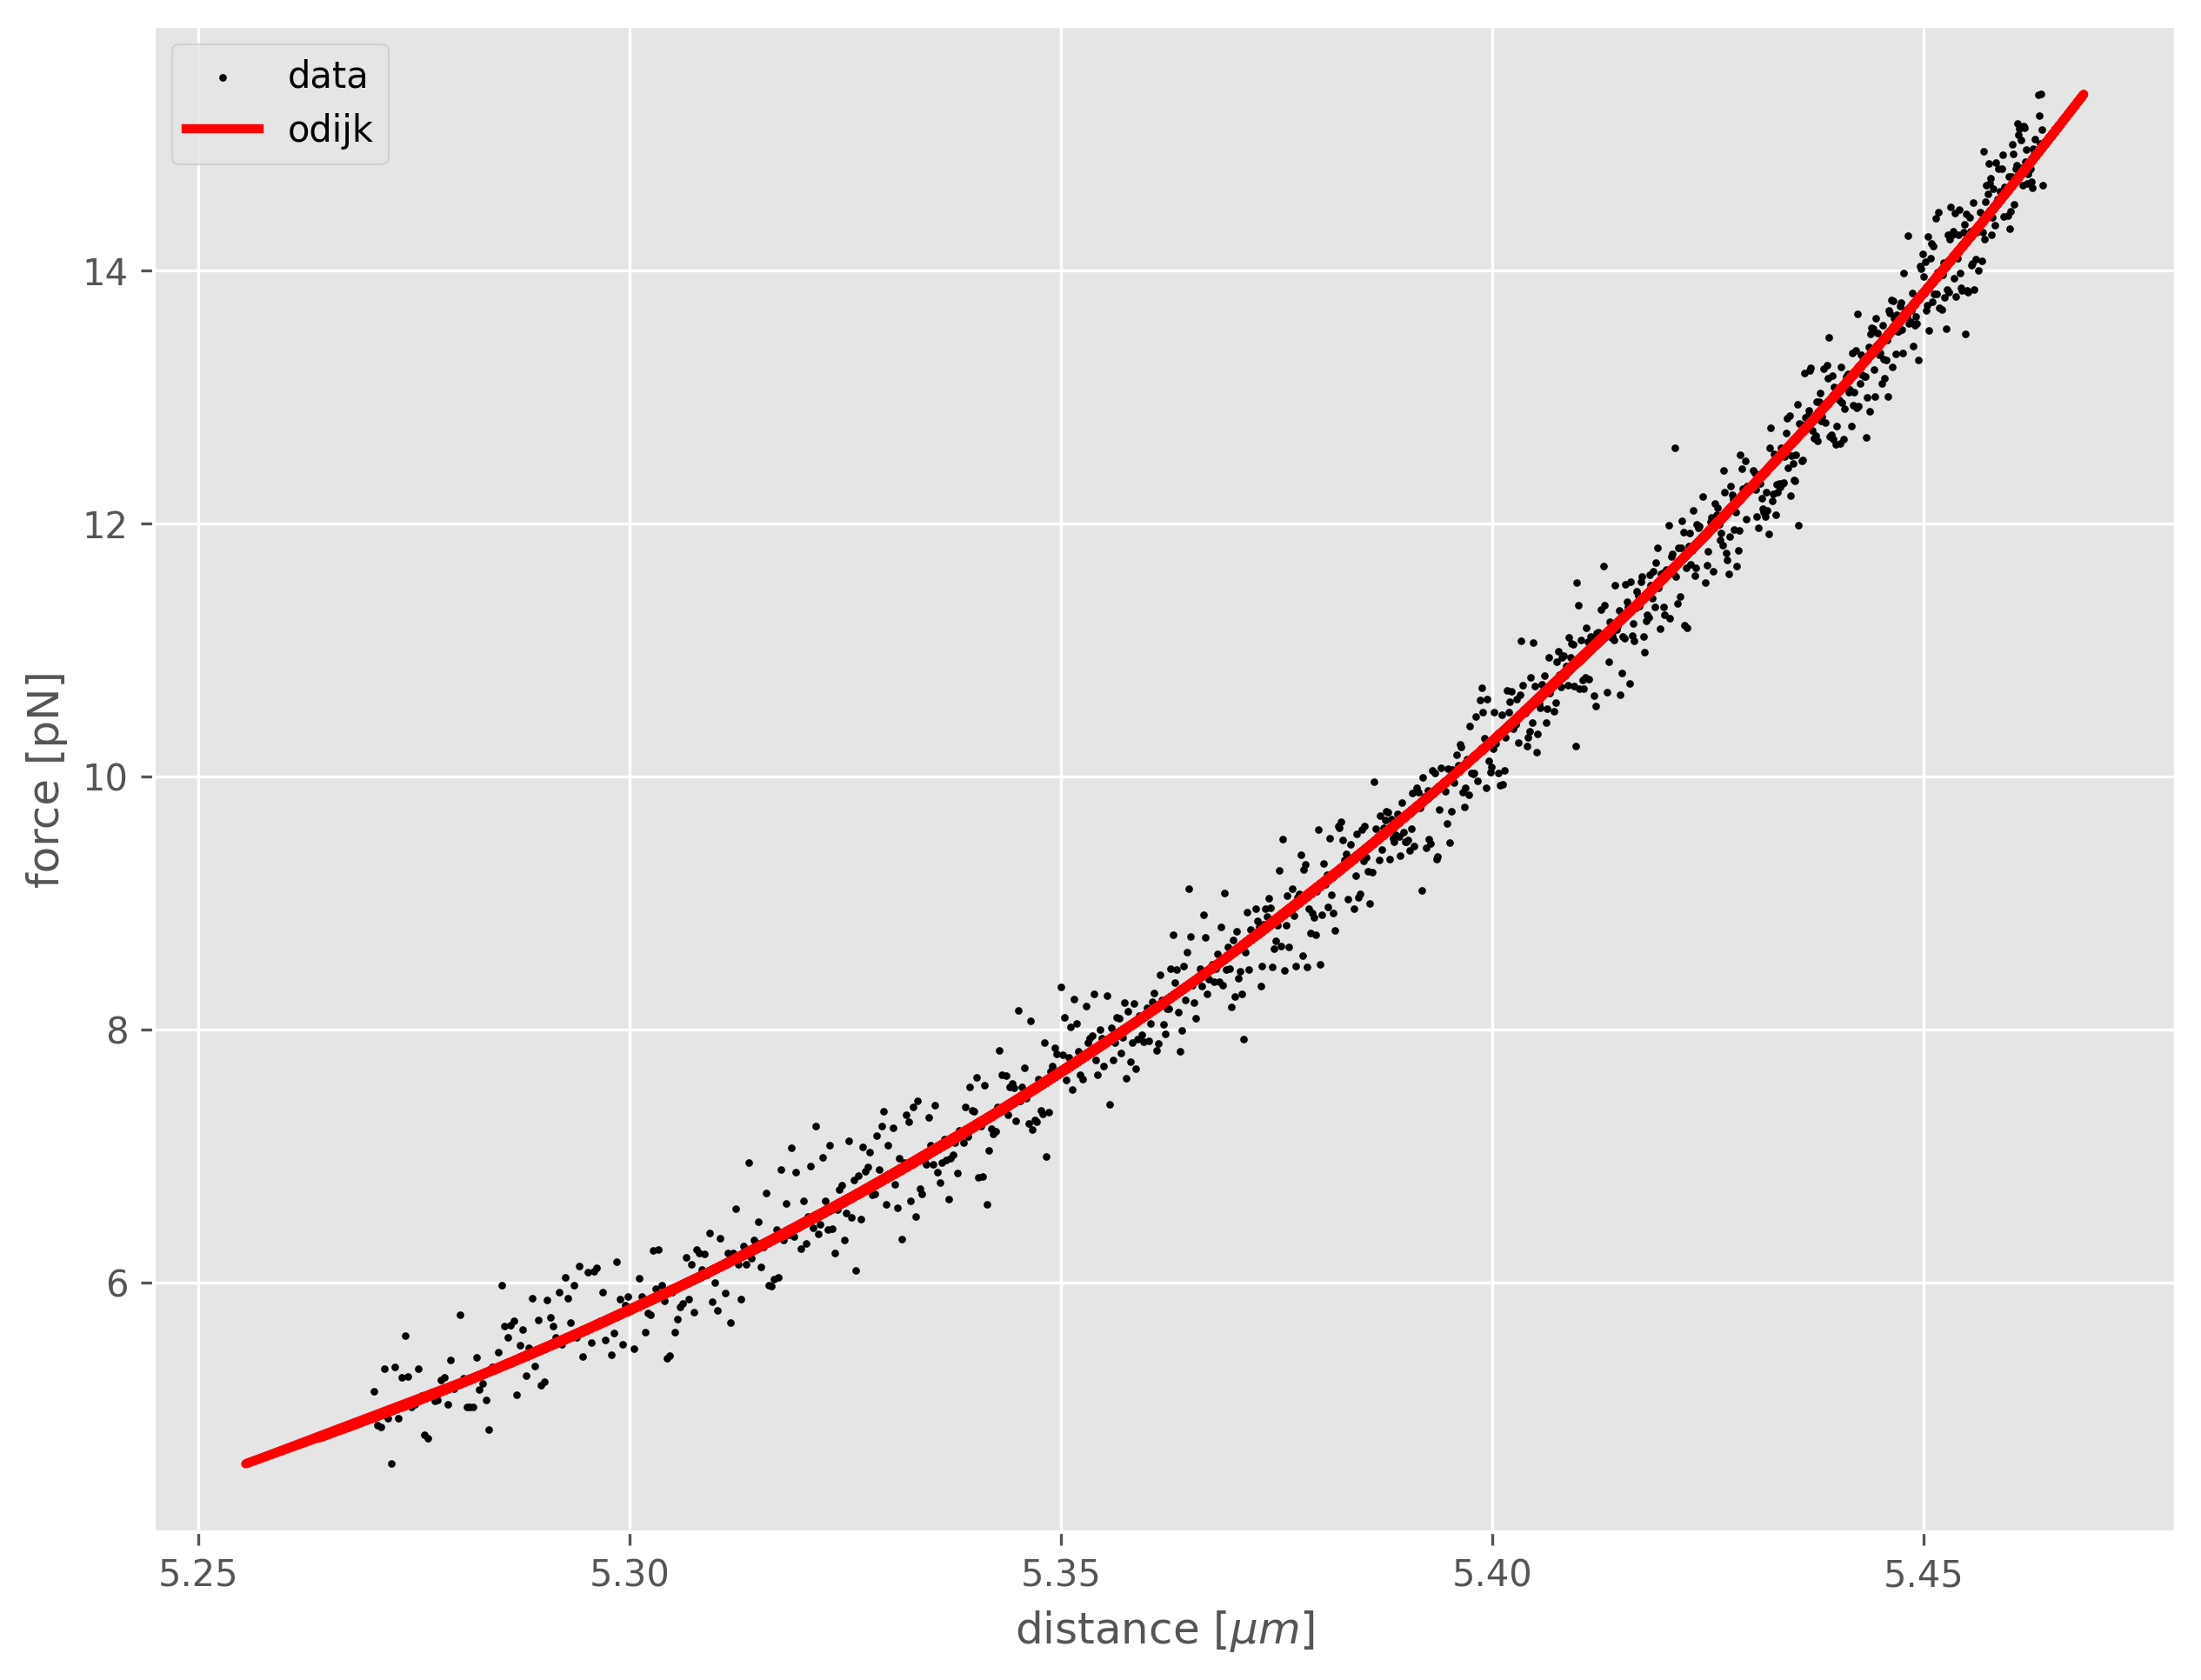

In [8]:
# Plot results
model.plot(data)

In [9]:
# Summary of fitting statistics
model.stats()

[[Model]]
    Model(odijk)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 1000
    # variables        = 3
    chi-square         = 0.02758826
    reduced chi-square = 2.7671e-05
    Akaike info crit   = -10492.1203
    Bayesian info crit = -10477.3970
    R-squared          = 0.99035248
[[Variables]]
    kBT:  4.185289 (fixed)
    Lc:   5576.19172 +/- 7.52744519 (0.13%) (init = 5600)
    Lp:   60.0419756 +/- 2.27049604 (3.78%) (init = 60.04198)
    S:    1073.45093 +/- 56.8841384 (5.30%) (init = 1255)
[[Correlations]] (unreported correlations are < 0.100)
    C(Lc, Lp) = -0.9964
    C(Lc, S)  = +0.9906
    C(Lp, S)  = -0.9765


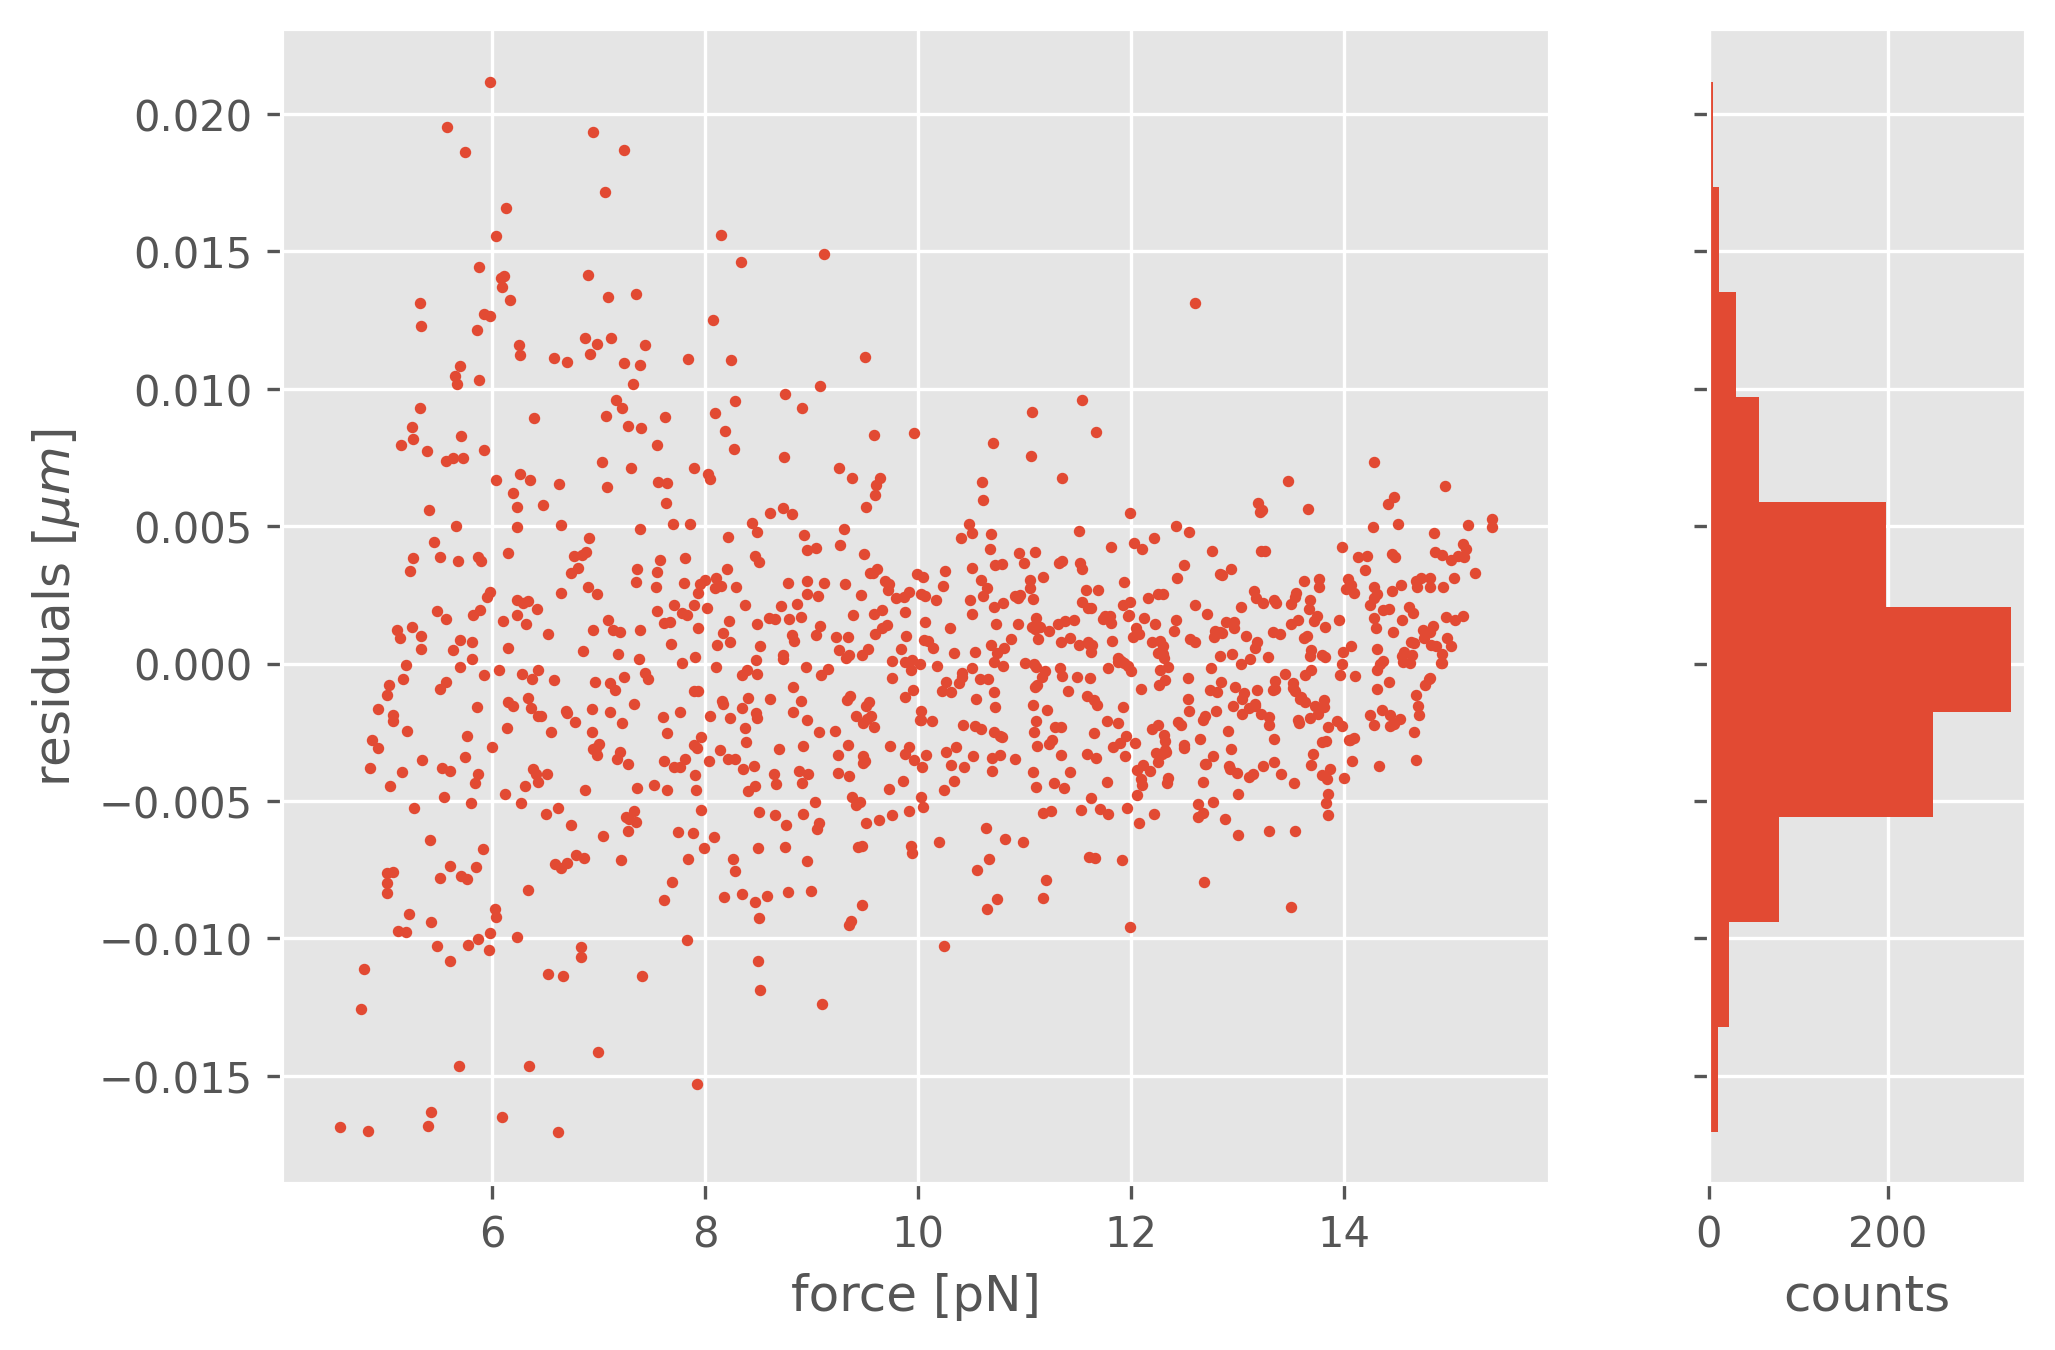

In [10]:
model.plot_residuals(data)